In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df = pd.read_csv("true_fake_news.csv")

In [3]:
df.head()

,Unnamed: 0,title,text,subject,date,Is Fake
0,5820,NH Car Dealer Gives Away Free AR-15s With Car...,Mike Hagan has a used car dealership and repai...,News,"June 18, 2016",1
1,22179,EP #16: Patrick Henningsen LIVE – ‘Official Wa...,Join Patrick every Wednesday at Independent Ta...,US_News,"March 9, 2017",1
2,18482,WOW! ALEX JONES Releases Secretly Recorded Int...,Alex Jones scooped NBC and Megyn Kelly with a ...,left-news,"Jun 15, 2017",1
3,13991,SAY GOOD BYE TO LONDON: Radical Muslim WINS Lo...,Has the entire world gone mad with political c...,politics,"May 3, 2016",1
4,16629,INFAMOUS ROMANIAN HACKER Tells FOX News Host H...,"Of course, America s favorite criminal candida...",Government News,"May 4, 2016",1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2000 non-null   int64 
 1   title       2000 non-null   object
 2   text        2000 non-null   object
 3   subject     2000 non-null   object
 4   date        2000 non-null   object
 5   Is Fake     2000 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 93.9+ KB


In [5]:
print("dataset memiliki %d baris dan %d kolom" %df.shape)

dataset memiliki 2000 baris dan 6 kolom


In [6]:
print(f'comparison between the news is fake or not',df['Is Fake'].value_counts(normalize=True)*100)

comparison between the news is fake or not 1    50.0
0    50.0
Name: Is Fake, dtype: float64


In [7]:
#checkin missing value
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
subject       0
date          0
Is Fake       0
dtype: int64

In [8]:
print(f'Duplicates in applications df:{df.iloc[:,1:].duplicated().sum()}, ({np.round(100*df.iloc[:,1:].duplicated().sum()/len(df),1)}%)')

Duplicates in applications df:0, (0.0%)


In [9]:
#add parameter errors coerce
df['date']= pd.to_datetime(df['date'].str.strip(), errors='coerce')

In [10]:
idx = df[df['date'].isnull()].index

In [11]:
print (df.iloc[idx])

Empty DataFrame
Columns: [Unnamed: 0, title, text, subject, date, Is Fake]
Index: []


In [12]:
df.date

0      2016-06-18
1      2017-03-09
2      2017-06-15
3      2016-05-03
4      2016-05-04
          ...    
1995   2017-02-08
1996   2017-11-21
1997   2017-10-20
1998   2017-11-05
1999   2016-04-12
Name: date, Length: 2000, dtype: datetime64[ns]

In [13]:
df['month']=df['date'].dt.to_period('M')

In [14]:
df_subject = df[(df['subject']=='politics') & (df['month'] >= '2017-10')]

In [22]:
df_subject.groupby(['subject','month'])['Is Fake'].value_counts()

subject   month    Is Fake
politics  2017-10  1          10
          2017-11  1           9
          2017-12  1          12
          2018-02  1           2
Name: Is Fake, dtype: int64

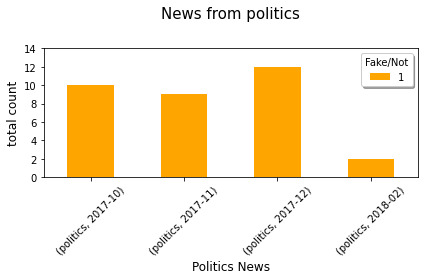

In [15]:
df_subject.groupby(['subject','month'])['Is Fake'].value_counts().unstack().plot(kind='bar', color='orange')
plt.title('News from politics', loc='center', pad=30, fontsize=15, color='black')
plt.xlabel('Politics News', fontsize= 12)
plt.ylabel('total count', fontsize= 12)
plt.legend(bbox_to_anchor=(1,1), shadow=True, title='Fake/Not')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1).astype(int))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

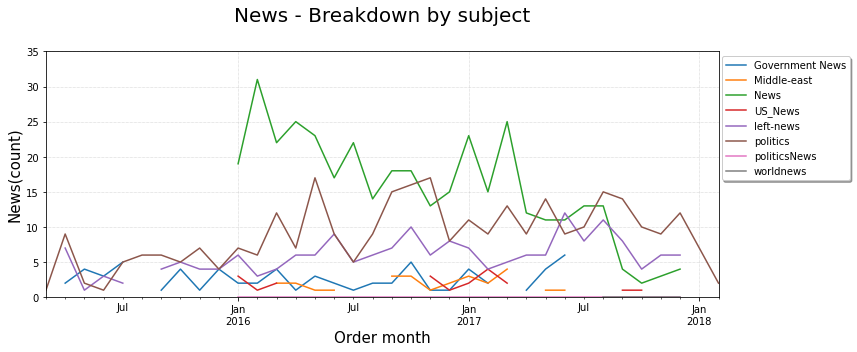

In [49]:
df_subject2 = df[(df['month'] >= '2011-10')]
# Buat Multi-Line Chart
df_subject2.groupby(['month', 'subject'])['Is Fake'].sum().unstack().plot()
plt.title('News - Breakdown by subject', loc='center', pad=30, fontsize=20, color='black')
plt.xlabel('Order month', fontsize = 15)
plt.ylabel('News(count)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, location = plt.yticks()
plt.yticks(labels, (labels/1).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.gcf().set_size_inches(12,5)
plt.tight_layout()
plt.show()

In [16]:
labels = df['Is Fake']

In [17]:
labels

0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: Is Fake, Length: 2000, dtype: int64

In [18]:
#DataFlair - Split the dataset
X_train,X_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

In [19]:
#DataFlair - Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(X_train) 
tfidf_test=tfidf_vectorizer.transform(X_test)

In [20]:
#DataFlair - Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)
#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 96.25%


In [21]:
#DataFlair - Build confusion matrix
confusion_matrix(y_test,y_pred, labels=[1,0])

array([[189,   9],
       [  6, 196]], dtype=int64)